# Small_Scale Fading Models

Propagation models that characterize the rapid fluctuations of the received signal strength over very
short travel distances or short time durations are called small-scale models. Small-scale models are helpful in
accurate performance evaluation of applications implemented over wireless channels.

## The Multipath Channel Model - Clarke's Model

In a multipath channel, multiple copies of a signal travel different paths with different propagation delays
τ and are received at the receiver at different phase angles and strengths. These rays add constructively or
destructively at the receiver front end, thereby giving rise to rapid fluctuations in the channel. The multipath
channel can be viewed as a linear time variant system where the parameters change randomly with respect to
time. The channel impulse response is a two dimensional random variable – h(t, τ) that is a function of two
parameters, instantaneous time t and the propagation delay τ. The channel is expressed as a set of random
complex gains at a given time t and the propagation delay τ. The output of the channel y(t) can be expressed
as the convolution of the complex channel impulse response h(t, τ) and the input x(t).

$$y(t) = \int_{0}^{\infty} h(t - \tau, \tau)x(t-\tau) d\tau$$

The Channel Auto-correlation function is given by:

$$R_{hh}(t_1, t_2; \tau_1, \tau_2) = E[h(t_1, \tau_1)h^*(t_2, \tau_2)]$$

The following assumptions can be made to restrict the channel model to the following specific set of categories:

- Wide sense stationary (WSS) channel model
- Uncorrelated scattering (US) channel model
- Wide sense stationary uncorrelated scattering (WSSUS) channel model

### Wide sense stationary (WSS) channel model

In this channel model, the impulse response of the channel is considered wide sense stationary (WSS), that is the channel impulse response is independent of time t, but it depends only on the difference between the time instants.

$$R_{hh}(\Delta t; \tau_1, \tau_2) = E[h(t, \tau_1)h^*(t + \Delta t, \tau_2)]$$

### Uncorrelated scattering (US) channel model

Here, the individual scattered components arriving at the receiver front end (at different propagation delays)
are assumed to be uncorrelated.

$$R_{hh}(t_1, t_2; \tau_1, \tau_2) = R_{hh}(t_1, t_2; \tau_1)\delta(\tau_1 - \tau_2)$$

### Wide sense stationary uncorrelated scattering (WSSUS) channel model

The WSSUS channel model combines the aspects of WSS and US channel model that are discussed above. it gives the following model:

$$R_{hh}(\Delta t, \tau) = E[h(t, \tau)h^*(t + \Delta t, \tau)]$$

## Channel Correlations & Power Spectra

The Fourier transform on the variable ∆t gives specific insight to channel properties in terms of propagation delay τ and the Doppler frequency f simultaneously. The Fourier transform of the two-dimensional autocorrelation function for a WSSUS channel on the variable ∆t is called scattering function and is given by:

$$S(f, \tau) = \int_{-\infty}^{\infty} R_{hh}(\Delta t, \tau)e^{-j2\pi f \Delta t} d\Delta t$$

Two important relationships can be derived from the scattering function - power delay profile (PDP) and Doppler power spectrum. Both of them affect the performance of a given wireless channel

Power delay profile, also called as multipath intensity profile S(τ) gives the signal intensity received over a multipath channel as a function of propagation delays. It can be obtained from scattering function, by integrating it over the entire frequency range (removing the dependence on Doppler frequency).

$$S(\tau) = \int_{-\infty}^{\infty} S(f, \tau) df$$

Power delay profile is a function of time which can be transformed to frequency domain by taking Fourier
transform. Fourier transform of power delay profile is called spaced-frequency correlation function. Spaced-frequency correlation function describes the spreading of a signal in frequency domain. This gives rise to the
derived channel parameter - coherence bandwidth.

Similarly, the Doppler power spectrum S(f) can be obtained by integrating the scattering function over the
entire range of propagation delays.

$$S(f) = \int_{-\infty}^{\infty} S(f, \tau) d\tau$$

The Doppler power spectrum describes the output power of the multipath channel in frequency domain. The
Doppler power spectrum when translated to time-domain by means of inverse Fourier transform is called
spaced-time correlation function. Spaced-time correlation function describes the correlation between different
scattered signals received at two different times as a function of the difference in the arrival times. It gives rise
to the concept of coherence time

<center>

![SNOWFALL](imgs/2.1.png)

</center>


### An Example Scattering Function

The scattering function combines information about Doppler spread and the path delays. Consider the typical U-shaped Jakes Doppler power spectral density, with the maximum Doppler shift fm and an exponential delay spread with mean τrms. The scattering function that describes the amount of scatter power per frequency and time bin is given by:

$$S(f, \tau) = \frac{P_{\text{local-mean}}}{4\pi f_m \sqrt{1 - \left(\frac{f-f_c}{f_m}\right)^2}} \cdot \frac{1}{\tau_{\text{rms}}} \exp\left(-\frac{\tau}{\tau_{\text{rms}}}\right)$$

where, $P_{\text{local-mean}}$ is the received power level averaged over an area of tens or hundreds of meters. The following script plots the given scattering function as a 3D plot. It also plots the power delay profile and Doppler power spectrum 

In [1]:
import numpy as np
import matplotlib, matplotlib.pyplot as plt

print('Matplotlib', matplotlib.__version__)
print('NumPy', np.__version__)

Matplotlib 3.7.2
NumPy 1.23.3


In [2]:
#input
fc=1800E6 #Carrier frequency (Hz)
fm=200 #Maximum Doppler shift (Hz)
t_rms=30e-6 #RMS Delay spread (s)
P_local = 0.2 #local-mean power (W)

In [3]:
#setting up plot
del_f = fm/30 #step size for frequency shifts
f = np.arange((fc-fm)+del_f, (fc+fm), del_f) #frequency domain
tau = np.arange(0, t_rms*3, t_rms/5) #range of propagation delays  
[TAU,F] = np.meshgrid(tau,f) 

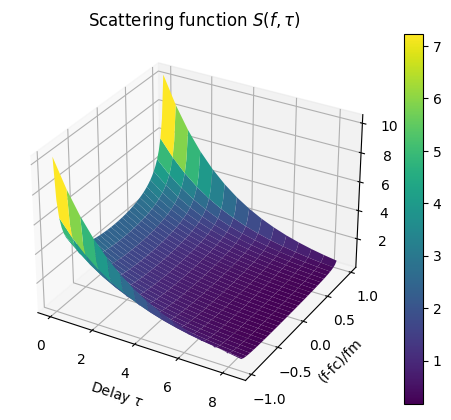

In [4]:
#plotting the scattering function
S = (P_local / (4*np.pi*fm*np.sqrt(1-((F-fc)/fm)**2))) * (1/t_rms) * (np.exp(-TAU/t_rms))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(TAU, (F-fc)/fm, S, cmap='viridis')

fig.colorbar(surf)
plt.title(r'Scattering function $S(f,\tau)$')
ax.set_xlabel(r'Delay $\tau$')
ax.set_ylabel('(f-fc)/fm')  
plt.show()


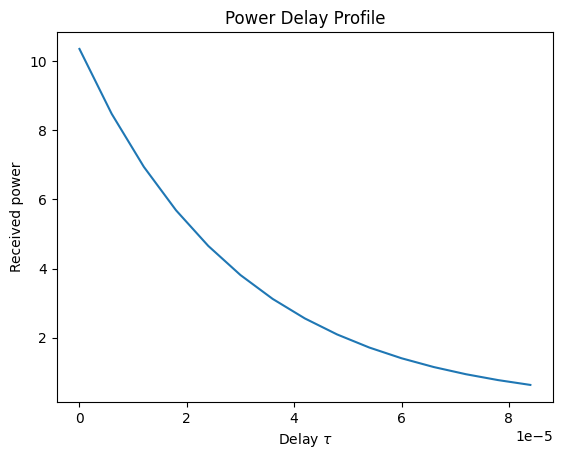

In [5]:
#plotting the Power Delay Profile
plt.figure()
plt.plot(tau, S[0,:])

plt.title('Power Delay Profile')
plt.xlabel(r'Delay $\tau$')
plt.ylabel('Received power')  
plt.show()

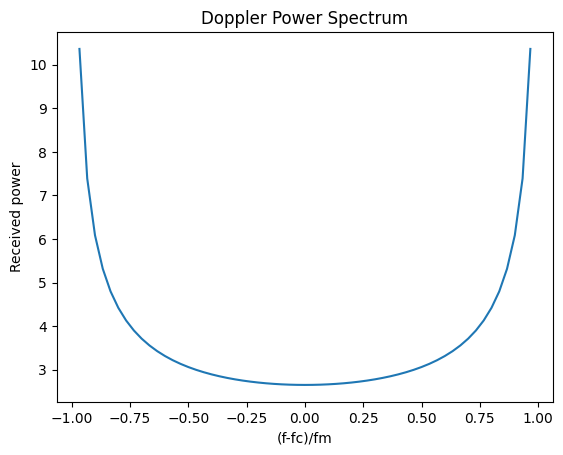

In [6]:
#plotting the Doppler Power Spectral Density
plt.figure()
plt.plot((f-fc)/fm, S[:,0])

plt.title('Doppler Power Spectrum')
plt.xlabel('(f-fc)/fm')
plt.ylabel('Received power')  
plt.show()

## The Power Delay Profile

A multipath channel can be characterized in multiple ways for deterministic modeling and power delay profile
(PDP) is one such measure. In a typical PDP plot, the signal power on each multipath is plotted against their
respective propagation delays.

The PDP, when expressed as an intensity function S(τ), gives the signal intensity received over a multipath channel as a function of propagation delays. The PDP plots can be obtained as the spatial average of the complex channel impulse response as:

$$S(\tau) = R_{hh}(0, \tau) = E \left[ |h(t, \tau)|^2 \right]$$

For continuous PDP, the RMS delay spread (τrms) can be calculated as:

$$\tau_{rms} = \sqrt{\frac{\int_{-\infty}^{\infty} S(\tau) (\tau - \tilde{\tau})^2 d\tau}{\int_{-\infty}^{\infty} S(\tau) d\tau}}$$

where, the mean delay is given by:

$$\tilde{\tau} = \sqrt{\frac{\int_{-\infty}^{\infty} S(\tau) \tau d\tau}{\int_{-\infty}^{\infty} S(\tau) d\tau}}$$

For discrete PDP:

$$\tau_{rms} = \sqrt{\frac{\sum_i p_i (\tau_i - \tilde{\tau})^2}{\sum_i p_i}}$$

$$\tilde{\tau} = \sqrt{\frac{\sum_i p_i \tau_i}{\sum_i p_i}}$$

Knowledge of the delay spread is essential in system design for determining the trade-off between the
symbol rate of the system and the complexity of the equalizers at the receiver. The ratio of RMS delay spread
(τrms) and symbol time duration (Tsym) quantifies the strength of intersymbol interference (ISI). Typically,
when the symbol time period is greater than 10 times the RMS delay spread, no ISI equalizer is needed in the
receiver. 

Maximum delay spread (Tm) and the symbol time period (Tsym) can be used to classify a
channel into frequency selective or non-selective category. This classification can also be done using coherence
bandwidth (a derived parameter from spaced frequency correlation function which in turn is the frequency
domain representation of power delay profile).


### Spaced frequency correlation function and coherence bandwidth

The spaced-frequency correlation function, also called frequency correlation function (FCF), is defined as
the Fourier transform of power delay profile.

$$R(\Delta f) = F.T[S(\tau)] = \int_{-\infty}^{\infty} \left[ \int_{-\infty}^{\infty} S(f, \tau) df \right] e^{-j2\pi\Delta f \tau} d\tau$$

The frequency correlation function is a useful indicator of dependencies of channel responses as a function
of difference between two given frequency components (∆ f = f1− f2). It is used to assess the distance between
two frequency components for the values to be effectively correlated. Alternatively, it is an indicator of signal
spreading in frequency domain often measured using a derived parameter called coherence bandwidth, which
is similar to the delay spread parameter derived from power-delay profile.

The normalized correlation between the frequency responses of the channel at two different frequencies is given by:

$$\rho(\Delta f) = \frac{\int_{-\infty}^{\infty} |h(t, \tau)|^2 \exp(-j\Delta f \tau) d\tau}{\int_{-\infty}^{\infty} |h(t, \tau)|^2 d\tau}$$

The coherence bandwidth is inversely proportional to the delay spread. There is no exact relationship between
the two parameters as it is heavily dependent on the shape of the power-delay-profile or the frequency correlation function of the channel

Approximate equations for coherence bandwidth can be found in the following table:

![SNOWFALL](imgs/2.2.png)

In [7]:
#The following codes takes an example discrete PDP and generates the FCF from it, plots them both and measure some related parameters
#inputs
Ps_dBm = np.array([0, -2.9, -5.8, -8.7, -11.6]) #list of received powers in dBm
delays = np.array([0, 50e-9, 100e-9, 150e-9, 200e-9]) #list of propagation delays

Ps_lin = 10**(Ps_dBm/10) #power levels in linear scale

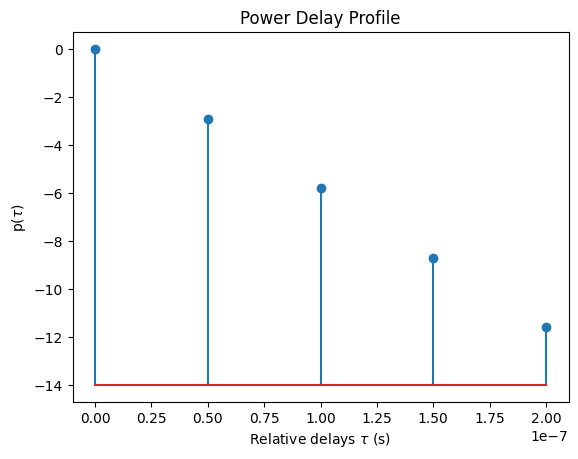

In [8]:
#plotting PDP
plt.figure()

markerline, stemlines, baseline = plt.stem(delays, Ps_dBm, bottom=-14) #the thied arg is to show the stem plot bottom up

plt.title('Power Delay Profile')
plt.xlabel(r'Relative delays $\tau$ (s)')
plt.ylabel(r'p($\tau$)')
plt.show()

In [9]:
#generating The Frequency Correlation Function (FCF)
num_samples = len(Ps_lin)
N = 216
dTau = 50e-9 #spacing of taus in the PDP
freqs = ((1/dTau)/N) * np.arange(0, (N//2))
FCF = np.fft.fft(Ps_lin,N) / num_samples #Take FFT of PDP
FCF = abs(FCF)/np.max(abs(FCF)) #normalize

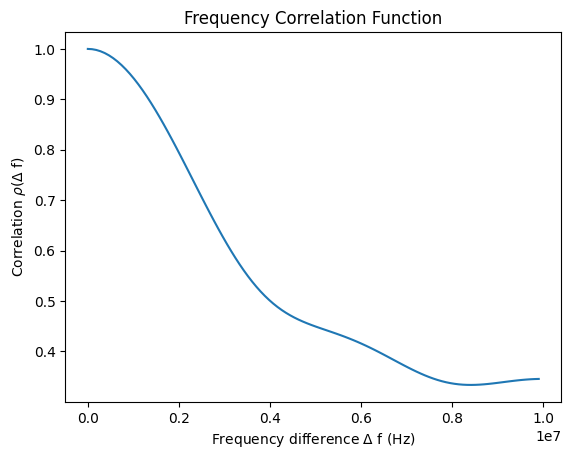

In [10]:
#plotting FCF
plt.figure
plt.plot(freqs,FCF[0:(N//2)])
plt.title('Frequency Correlation Function')
plt.xlabel(r'Frequency difference $\Delta$ f (Hz)')
plt.ylabel(r'Correlation $\rho$($\Delta$ f)')
plt.show()

In [11]:
def analyze_PDP(Ps_dBm,TAUs):

    Ps_lin = 10**(Ps_dBm/10) #power levels in linear scale

    mean_delay = np.sum(Ps_lin*TAUs) / np.sum(Ps_lin)
    rms_delay = np.sqrt( (np.sum( Ps_lin*((TAUs - mean_delay)**2) )) / np.sum(Ps_lin))

    symbol_rate = 1 / (10*rms_delay) #Recommended max sym rate to avoid ISI
    coherence_BW = 1 / (50*rms_delay) #0.9 correlation

    return mean_delay, rms_delay, symbol_rate, coherence_BW

In [12]:
#analyzing PDP to get mean & rms delay, coherence bandwidth and recommended symbol rate
Ps_dBm = np.array([-20, -10, -10, 0])
delays = np.array([0, 1e-6, 2e-6, 5e-6])

[mean_delay, rms_delay, symbol_rate, coherence_BW] = analyze_PDP(Ps_dBm, delays)

print('Mean Delay ', f"{mean_delay:.2e}")
print('RMS Delay ', f"{rms_delay:.2e}")
print('Recommneded Symbol Rate ', f"{symbol_rate:.2e}")
print('Coherence Bandwidth ', f"{coherence_BW:.2e}")

Mean Delay  4.38e-06
RMS Delay  1.37e-06
Recommneded Symbol Rate  7.28e+04
Coherence Bandwidth  1.46e+04


## The Doppler Power Spectrum

Doppler power spectrum gives the power profile as a function of Doppler frequency f . The range of Doppler
frequency values for which the Doppler power profile is essentially nonzero is defined as the Doppler
spreadDoppler spread Bd of the channel. Doppler spread is also referred as fading rate of the channel. A
large value of Doppler spread characterizes a rapidly changing channel.

The Doppler power spectrum is obtained by integrating the scattering function over the entire range of
propagation delays

$$S(f) = \int_{-\infty}^{\infty} S(f, \tau) d\tau$$

### Spaced time correlation function and coherence time

The inverse Fourier transform of Doppler power spectrum defines the spaced time correlation function, that
quantifies the correlation of two samples of channel response taken at different times.

$$R(\Delta t) = F.T^{-1}[S(f)] = \int_{-\infty}^{\infty} \left[ \int_{-\infty}^{\infty} S(f, t) \, dt \right] e^{j2\pi f\Delta t} \, df$$

A derived parameter of this function is the coherence time Tc that indicates the period of time over which the
fading process is highly correlated. The reciprocal of Doppler spread Bd is a measure of coherence time Tc.
Coherence time provides a strong indication, about the rate at which the channel attenuation and the phase
shift change over time.

Therefore, due to inverse relationship between Doppler spread Bd and coherence time Tc, a channel with
larger Doppler spread when compared to the signal bandwidth Bs
is also characterized by smaller coherence
time Tc with respect to the symbol period Tsym. Hence, for the case Bs < Bd or equivalently Tsym > Tc, the
transmitted signal undergoes time-selective or fast fading. Alternatively, a channel with smaller Doppler spread
when compared to the signal bandwidth, that is Bs > Bd (equivalently, larger coherence time compared to
signaling interval, that is Tsym < Tc), undergoes time-nonselective or slow fading.


### Jake's Model

The Fading Channel is usually statistically descirbed by one of the famous distributions like: Rayleigh, Rician, Nakagami-m. This models give us a statistically description of the fading channel coefficient.

The fading model chosen assumes that all scattered waves arrive, each with their
own random angle of arrival that are uniformly distributed within [0,2π]. Hence, such scattered waves arrive
with different random Doppler frequency shifts. When viewed in frequency domain, the Doppler effect causes
frequency dispersion in the received signal that can be visualized in the form of probability density function
of frequency, also referred as power spectral density or power spectrum.

The power spectral density Sµµ (f) for the scattered components described by The Rayleigh model is given by:

$$S_{\mu\mu}(f) = S_{\mu i\mu i}(f) + S_{\mu q\mu q}(f)$$

The inverse Fourier transform of power spectral density is the auto-correlation function. The corresponding
auto-correlation function for the scattered components in the previous equation is given by:

$$r_{\mu\mu}(\tau) = r_{\mu i\mu i}(\tau) + r_{\mu q\mu q}(\tau)$$

The auto-correlation function for the Jakes model is given by:

$$r_{\mu i\mu i}(\tau) = r_{\mu q\mu q}(\tau) = \sigma_0^2 J_0(2\pi f_{\text{max}} \tau)$$


where, $J_0(.)$ denotes the 0-th order Bessel function of the first kind

The corresponding PSD:

$$S_{\mu i\mu i}(f) = S_{\mu q\mu q}(f) = 
\begin{cases} 
\sigma_0^2 \pi f_{\text{max}} \sqrt{1 - \left(\frac{f}{f_{\text{max}}}\right)^2}, & |f| \leq f_{\text{max}} \\
0, & |f| > f_{\text{max}}
\end{cases}$$


In [13]:
#generating and plotting the autocorrelation function & PSD for the Jake's Model
#inputs
Ts = 0.001 #sampling time
Fs = 1/Ts
fmax = 91 #maximum doppler frequency in Hertz
g_var = 1 #variance of the gaussian process
num_samples = 1024

In [14]:
from scipy.special import jn #Bessel function of the first kind of real order and complex argument.

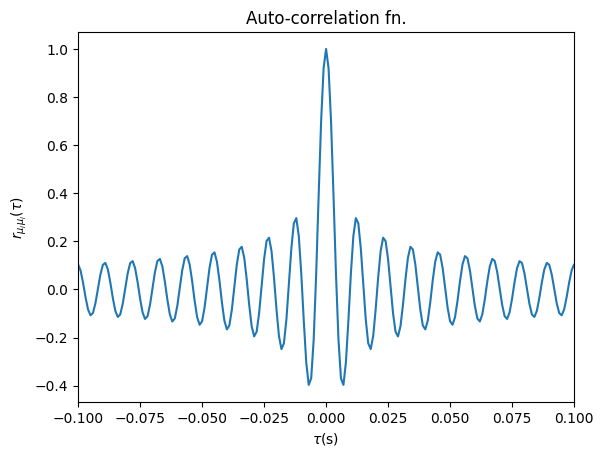

In [15]:
#generating & plotting Jake's ACF 
tau = Ts * np.arange((-num_samples//2), (num_samples//2))
ACF = g_var*jn(0, 2*np.pi*fmax*tau) #auto-correlation function

plt.figure()

plt.plot(tau, ACF)
plt.xlim(-0.1, 0.1)
plt.title('Auto-correlation fn.')
plt.xlabel(r'$\tau$(s)')
plt.ylabel(r'$r_{\mu_i\mu_i}$($\tau$)')

plt.show()

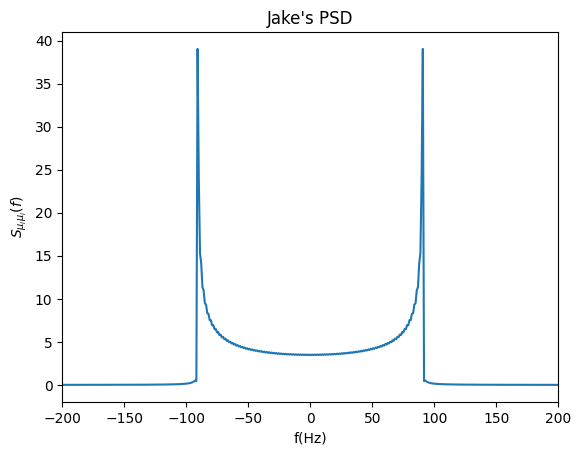

In [16]:
#generating Jake's PSD

freqs = (Fs/num_samples) * np.arange((-num_samples//2), (num_samples//2))
PSD = abs(np.fft.fftshift(np.fft.fft(ACF, num_samples)))

plt.figure()

plt.plot(freqs, PSD)
plt.xlim(-200, 200)
plt.title("Jake's PSD")
plt.xlabel('f(Hz)')
plt.ylabel(r'$S_{\mu_i\mu_i}(f)$')

plt.show()

In [18]:
#verifying max doppler frequency from plot
fmax_v = abs(freqs[np.argmax(PSD)])
doppler_spread = 2 * fmax_v
coherence_time = 1/doppler_spread
print('Max Doppler Frequency: ', f"{fmax_v:.2e}")
print('Doppler Spread: ', f"{doppler_spread:.2e}")
print('Coherence Time: ', f"{coherence_time:.2e}")

Max Doppler Frequency:  9.08e+01
Doppler Spread:  1.82e+02
Coherence Time:  5.51e-03


## Classification of Small-Scale Fading

Classification of fading channels based on multipath delay spread:

<center>

![SNOWFALL](imgs/2.3.png)

</center>

Classification of fading channels based on Doppler spread:

<center>

![SNOWFALL](imgs/2.4.png)

</center>